In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Load data

In [2]:
# Specify the path to the cutomer_data folder in the parent directory
working_directory = "B:/Projects/Marketing Analytics Project/Marketing-Analysis-unimib/"
data_folder_path = "../Data/"

In [3]:
# Read the cutomer_cutomer_cutomer_data file using pandas
customer_accounts_data = pd.read_csv(data_folder_path + "tbl_customer_accounts.csv")
adresses_data = pd.read_csv(data_folder_path + "tbl_addresses.csv")
customer_data = pd.read_csv(data_folder_path + "tbl_customers.csv")
orders_data = pd.read_csv(data_folder_path + "tbl_orders.csv")
products_data = pd.read_csv(data_folder_path + "tbl_products.csv")
customer_reviews_data = pd.read_csv(data_folder_path + "tbl_customer_reviews.csv")
labelled_reviews_data = pd.read_csv(data_folder_path + "tbl_labelled_reviews.csv")

# Customers

In [4]:
customer_data.shape

(140946, 8)

In [5]:
customer_data.head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True


In [6]:
customer_data.tail()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
140941,449222,428121,1945-05-30,F,NaN,libero.it,1.0,True
140942,368113,346970,1943-11-18,F,NaN,yahoo.com,1.0,True
140943,424451,403292,1943-05-07,F,NaN,gmail.com,1.0,True
140944,808137,789737,1943-02-13,F,NaN,yahoo.it,1.0,True
140945,442860,421749,1940-05-18,F,NaN,gmail.com,1.0,True


In [45]:
customer_data['email_provider'].value_counts()

email_provider
gmail.com                       58494
libero.it                       21668
hotmail.it                      10988
alice.it                         7098
yahoo.it                         6300
                                ...  
personal_mail_provider_4441         1
personal_mail_provider_12321        1
personal_mail_provider_14426        1
personal_mail_provider_20142        1
personal_mail_provider_17261        1
Name: count, Length: 8484, dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140946 entries, 0 to 140945
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          140946 non-null  int64  
 1   address_id           140946 non-null  int64  
 2   birthdate            140946 non-null  object 
 3   gender               140946 non-null  object 
 4   job_type             4295 non-null    object 
 5   email_provider       139111 non-null  object 
 6   flag_phone_provided  129675 non-null  float64
 7   flag_privacy         140946 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 7.7+ MB


## Customer ID - Address ID
- Some Addresses have been used by up to 3 customers (They are supposedly a family/roommates/residents of the same appartement)
- There is a Address Id used 2000 times and is a missing value in Addresses table. => Addresses are not missing in this table but must be checked with the other table to see if there are any truly missing ones.
- 2155 customers with Address ids which have no address info in the addresses table

In [8]:
customer_data['customer_id'].unique().shape[0]

140946

In [9]:
# Calculate minimum value of the 'customer_id' column
min_value = customer_data['customer_id'].min()

# Calculate maximum value of the 'customer_id' column
max_value = customer_data['customer_id'].max()

# Optionally, you can print these values
print(f"Minimum: {min_value}, Maximum: {max_value}")

Minimum: 23, Maximum: 934879


There are addresses with multiple customers

In [10]:
print(f"The number of unique customer_id values is {customer_data['customer_id'].unique().shape[0]}")

print(f"The number of unique address_id values is {customer_data['address_id'].unique().shape[0]}")

print(f"The number of unique customer rows is {customer_data.drop_duplicates().shape[0]}")

The number of unique customer_id values is 140946
The number of unique address_id values is 138648
The number of unique customer rows is 140946


ID 900091 has been repeated 2102 times which is an anomly

In [11]:
customer_data.groupby('address_id').size().sort_values(ascending=False)

address_id
900091    2102
745497       3
590725       2
465404       2
432307       2
          ... 
316732       1
316711       1
316710       1
316706       1
443267       1
Length: 138648, dtype: int64

In [12]:
customer_data[customer_data['address_id'] == 900091].head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
37,501387,900091,1997-02-25,M,NaN,virgilio.it,1.0,True
44,869732,900091,1996-12-16,M,NaN,libero.it,1.0,True
80,865261,900091,1996-02-01,F,NaN,gmail.com,1.0,True
139,866378,900091,1995-01-07,F,NaN,libero.it,1.0,True
185,871403,900091,1994-05-12,F,NaN,hotmail.it,1.0,True


The value is null and must be considered as a missing value.

In [13]:
adresses_data[adresses_data['address_id'] == 900091]

,address_id,postal_code,district,region


Let's compare addresses and customers to evaluate the addresses and its accuracy

In [14]:
customer_addresses_joined_data = customer_data[['customer_id', 'address_id']].merge(adresses_data, on='address_id', how='left')

Missing data on addresses
There Are 53 address ids that are missing data in the addresses table and thus are not usable.

In [15]:
customers_missing_address = customer_addresses_joined_data[customer_addresses_joined_data[['postal_code', 'district', 'region']].isnull().all(axis=1)]
unique_missing_addresses = customers_missing_address['address_id'].unique()
unique_missing_addresses.shape[0]

53

In [16]:
customer_data['address_id'].isin(unique_missing_addresses).sum()

2155

In [60]:
adresses_data.sample(5)

,address_id,postal_code,district,region
150366,575043,46044.0,MN,LOMBARDIA
32501,452629,30174.0,VE,VENETO
83020,419110,81039.0,CE,CAMPANIA
196490,211316,65010.0,PE,ABRUZZO
12520,238618,36040.0,VI,VENETO


# Customer Account

In [51]:
customer_accounts_data.shape

(169494, 6)

In [62]:
customer_accounts_data[customer_accounts_data['customer_id'].value_counts() > 1]

C:\Users\BlackDEATH\AppData\Local\Temp\ipykernel_12912\2887972593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer_accounts_data[customer_accounts_data['customer_id'].value_counts() > 1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [58]:
customer_accounts_data['account_id'].value_counts()

account_id
774557    3
373919    2
111470    2
14985     2
826014    2
         ..
369815    1
369969    1
369819    1
369821    1
839535    1
Name: count, Length: 169086, dtype: int64

In [59]:
customer_accounts_data[customer_accounts_data['account_id'] == 774557]

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
123527,760880,774557,36,premium,1,2023-01-28
124271,801565,774557,36,premium,1,2023-01-28
127801,826836,774557,36,premium,1,2023-01-28


In [56]:
customer_accounts_data[customer_accounts_data['customer_id'] == 859327]

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
134125,859327,849495,24,business premium,0,2023-03-15
134126,859327,849532,24,business premium,0,2023-03-15
134127,859327,849542,24,business standard,1,2023-03-15


In [47]:
customer_accounts_data[customer_accounts_data['loyatlty_status'] == 0]

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
38,21750,155594,20,premium,0,2022-03-13
457,106366,424,47,business standard,0,2022-01-02
523,106937,1007,47,standard,0,2022-01-02
668,102670,2852,46,standard,0,2022-01-03
718,108013,2111,7,premium,0,2022-01-03
...,...,...,...,...,...,...
168948,871366,856504,21,standard,0,2023-03-18
169274,899702,887777,49,business standard,0,2023-04-05
169278,487516,424599,1,standard,0,2022-07-21
169405,905490,894316,24,standard,0,2023-04-08


# Products
- No names for the Products
- 14 classes of products / 88538 number of products

In [26]:
products_data.shape

(88538, 2)

In [25]:
products_data.head()

,product_id,product_class
0,35996051,9
1,35980371,14
2,31276196,4
3,31276224,4
4,31456495,4


In [30]:
products_data['product_id'].unique().shape[0]

88538

In [35]:
products_data['product_class'].value_counts().sort_index()

product_class
1      2203
2      4105
3      7326
4      5945
5      2528
6      3340
7      9974
8      2241
9     13325
10     9845
11     6690
12    13893
13     5283
14     1840
Name: count, dtype: int64

# Orders

In [36]:
orders_data.shape

(1039865, 8)

In [37]:
orders_data.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [41]:
# Assuming your DataFrame is called "data"
dates = pd.to_datetime(orders_data['purchase_datetime']).dt.date

# calculate the range of the entire dataset for the column purchase_datetime
purchase_datetime_range = dates.max() - dates.min()
purchase_datetime_range

datetime.timedelta(days=364)

# Samples

In [17]:
customer_accounts_data.head(10)

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23
5,770374,814968,10,premium,1,2023-02-23
6,834288,815151,47,premium,1,2023-02-23
7,803528,780986,20,premium,1,2023-02-02
8,783266,814734,34,premium,1,2023-02-23
9,833948,814712,22,premium,1,2023-02-23


In [18]:
customer_accounts_data.tail(10)

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
169484,847148,829643,23,standard,1,2023-03-03
169485,884402,870527,9,standard,1,2023-03-25
169486,7865,780242,9,business premium,1,2023-02-01
169487,540836,485279,24,standard,1,2022-08-24
169488,362172,281597,32,business standard,1,2022-05-09
169489,828458,895971,47,standard,1,2023-04-09
169490,575891,525794,1,standard,1,2022-09-14
169491,316991,231471,14,standard,1,2022-04-15
169492,403638,329448,1,standard,1,2022-05-31
169493,856065,839535,13,standard,1,2023-03-09


# Size and Range

In [19]:
customer_accounts_data.shape

(169494, 6)

In [20]:
customer_accounts_data.describe()

,customer_id,account_id,favorite_store,loyatlty_status
count,169494.000000,169494.000000,169494.000000,169494.000000
mean,453477.476807,454051.698202,22.794506,0.992153
std,260804.531519,253823.105754,15.601191,0.088235
min,16.000000,3.000000,1.000000,0.000000
25%,233721.500000,246909.250000,7.000000,1.000000
50%,455237.500000,450119.500000,24.000000,1.000000
75%,670383.750000,664456.000000,37.000000,1.000000
max,934892.000000,928121.000000,49.000000,1.000000


No Missing data in the consumer data

In [21]:
customer_accounts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169494 entries, 0 to 169493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      169494 non-null  int64 
 1   account_id       169494 non-null  int64 
 2   favorite_store   169494 non-null  int64 
 3   loyalty_type     169494 non-null  object
 4   loyatlty_status  169494 non-null  int64 
 5   activation_date  169494 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.8+ MB


In [22]:
customer_accounts_data['customer_id'].duplicated().sum()

310

In [23]:
customer_accounts_data[['customer_id', 'account_id']].duplicated().sum()

0

# Product Analysis

## Most Sold Products
This is an analysis over products, Taking into consideration how much they are sold, what is their sale rate in different Regions/Stores/Times, and ...

**Questions/Hypothesis**

1 - This business has a variety of products. If we extract different types of products based on their sale data, we can treat them appropriately. For instance products with high sales do not need promotion but they can be leveraged to incentivize customer to buy other products. This depends on the clustering and labeling of the products and needs a functional labeling strategy. maybe the labeling (general high sale - general low sale - time specific high sale - region specific high sale - store specific high sale - neutral/overall medium sale)
- There are certain products that are generally bought everywhere and have high sales. Which products are they?
- There are Certain products which have high sales on certain situation and are affiliated with that Region/Store/Time. Which products are they?

We ignore the refunds for this analysis

In [72]:
data = orders_data[orders_data['direction'] == 1]

### General
What are the most sold products among all the data?

In [73]:
data.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [80]:
general_product_sales = data.groupby('product_id').size().sort_values(ascending=False)
general_product_sales.describe()

count     2000.000000
mean       488.654000
std       1037.723802
min         24.000000
25%        242.000000
50%        324.000000
75%        493.000000
max      37204.000000
dtype: float64

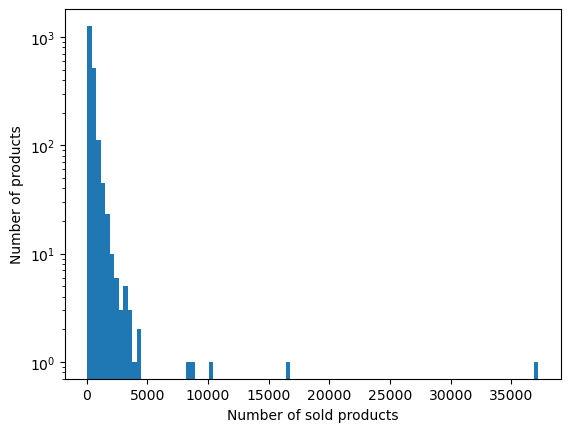

In [81]:
# plot the histogram of sold products, x axis is number of sold products, y axis is number of products in log scale
plt.hist(general_product_sales, bins=100, log=True)
plt.xlabel('Number of sold products')
plt.ylabel('Number of products')
plt.show()

In [83]:
# Assuming general_product_sales is a pandas Series with item_id as index and total sales as values
# Convert the Series to a DataFrame
product_sales_general = pd.DataFrame({'product_id': general_product_sales.index, 'total_sales': general_product_sales.values})

# Reset the index to make item_id a column
product_sales_general.reset_index(inplace=True, drop=True)

# Display the DataFrame
print(product_sales_general)

      product_id  total_sales
0       33700716        37204
1       33817091        16505
2       48011971        10405
3       48020504         8780
4       34843564         8376
...          ...          ...
1995    36074535           65
1996    35143255           54
1997    36140146           32
1998    32093992           24
1999    35805126           24

[2000 rows x 2 columns]


### Product Sales for Each store
- in the orders the stores are from 2 to 49 (48 Stores)

In [ ]:
print(sorted(data['store_id'].unique()))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
data[['product_id', 'store_id', 'direction']]

,product_id,store_id,direction
0,35551922,49,1
1,30344384,49,1
2,33794292,49,1
3,33795776,49,1
4,36235381,49,1
...,...,...,...
1039860,35508942,29,1
1039861,36237691,44,1
1039862,81259479,44,1
1039863,34067775,46,1


In [ ]:
data

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851
...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217


In [ ]:
# pivot the data to get the total number of sales of each product in each store
product_sales_by_store = data[['product_id', 'store_id', 'direction']].pivot_table(index='product_id', columns='store_id', values='direction', aggfunc='sum', fill_value=0)
product_sales_by_store

store_id,2,3,4,5,6,7,8,9,10,11,...,40,41,42,43,44,45,46,47,48,49
product_id,,,,,,,,,,,,,,,,,,,,,
504553,6,3,2,4,4,4,2,7,5,3,...,8,12,6,2,2,7,3,4,8,4
30033521,2,4,0,5,0,1,2,2,7,3,...,17,3,7,2,2,6,0,1,17,10
30044455,18,5,2,17,6,0,5,3,7,2,...,15,7,4,14,38,1,1,8,5,49
30062452,5,8,10,6,3,5,2,7,4,3,...,7,9,2,5,5,8,2,5,1,18
30072014,4,9,0,18,5,4,1,5,3,7,...,9,6,2,7,3,5,5,5,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82040488,3,2,0,3,36,16,2,1,2,2,...,3,3,1,0,2,4,2,11,4,5
82042962,2,2,1,8,2,3,1,6,7,5,...,4,6,1,3,1,8,0,6,10,7
82042965,5,3,1,7,1,3,5,2,8,4,...,1,3,10,4,6,10,3,3,5,2


### Product Sales For each Region

### Final Merge of all the data on product sales

In [84]:
# merge all results into a single DataFrame for further analysis
product_sales_aggregation = product_sales_general.merge(product_sales_by_store, left_on='product_id', right_on='product_id', how='left')
product_sales_aggregation

,product_id,total_sales,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,33700716,37204,564,809,518,839,871,1100,602,733,...,490,770,688,789,563,627,323,926,505,704
1,33817091,16505,122,229,99,373,430,0,193,458,...,237,421,493,173,114,0,121,697,190,285
2,48011971,10405,637,120,1213,32,27,117,70,254,...,159,36,214,32,533,260,155,632,598,382
3,48020504,8780,129,62,120,373,78,45,19,115,...,96,436,192,100,117,129,76,907,260,118
4,34843564,8376,14,412,88,119,356,694,30,20,...,93,183,65,122,133,259,152,180,94,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,36074535,65,5,2,1,4,1,1,1,2,...,1,1,2,3,1,2,0,2,2,0
1996,35143255,54,0,0,0,4,1,1,1,1,...,0,0,0,0,0,0,0,1,5,2
1997,36140146,32,0,0,1,1,0,0,1,1,...,1,1,1,0,1,0,0,0,0,8
1998,32093992,24,0,0,1,1,0,0,0,11,...,0,0,0,0,2,0,0,0,1,0


### Compare All sales data to find patterns

#### Comparison of General Sales with Store Sales

**Questions To Answer**

1. Which products have high sales in almost all situations?
2. which products have high sales in specific stores but low on the others?
3. Any anomalies or patterns in how the sales differ?